
# ---> MODELO DE PROPENSION DE COMPRA <---

# 1. CARGA DE DATOS

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("datos/DS_Compra.csv")

In [4]:
# Resición Inicial
data.head()

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
0,10001,M,19.0,1500,S,0
1,10002,M,35.0,1600,C,0
2,10003,F,26.0,3500,C,0
3,10004,F,27.0,4700,C,0
4,10005,M,19.0,6300,S,0


In [5]:
data.tail()

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
395,10396,F,46.0,3400,C,1
396,10397,M,51.0,1900,S,1
397,10398,F,50.0,1600,S,1
398,10399,M,36.0,2700,C,0
399,10400,F,49.0,3000,C,1


In [6]:
data.shape

(400, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
ID             400 non-null int64
SEXO           400 non-null object
EDAD           387 non-null float64
INGRESOS       400 non-null int64
ESTADOCIVIL    392 non-null object
FLAG_COMPRA    400 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 18.8+ KB


In [8]:
# Obtenere tipos de datos
pd.DataFrame(data.dtypes)

,0
ID,int64
SEXO,object
EDAD,float64
INGRESOS,int64
ESTADOCIVIL,object
FLAG_COMPRA,int64


# 2. ANÁLISIS DESCRIPTIVO DE LOS DATOS

In [9]:
data.describe(include = 'all')

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
count,400.000000,400,387.000000,400.000000,392,400.000000
unique,NaN,2,NaN,NaN,3,NaN
top,NaN,F,NaN,NaN,S,NaN
freq,NaN,204,NaN,NaN,214,NaN
mean,10200.500000,NaN,37.589147,6476.500000,NaN,0.357500
std,115.614301,NaN,10.523312,7705.031897,NaN,0.479864
min,10001.000000,NaN,18.000000,1200.000000,NaN,0.000000
25%,10100.750000,NaN,29.000000,3500.000000,NaN,0.000000
50%,10200.500000,NaN,37.000000,5800.000000,NaN,0.000000
75%,10300.250000,NaN,46.000000,7300.000000,NaN,1.000000


In [10]:
# Frecuencias de estado civil
data["ESTADOCIVIL"].value_counts()

S    214
C    125
D     53
Name: ESTADOCIVIL, dtype: int64

In [11]:
# Frecuencias relativas de estado civil
data["ESTADOCIVIL"].value_counts(normalize = True, dropna = False) 
# normalize: para frecuenciaas relativas 
# dropna: eliminar nulos

S      0.5350
C      0.3125
D      0.1325
NaN    0.0200
Name: ESTADOCIVIL, dtype: float64

In [12]:
# Edad
data["EDAD"].value_counts(bins = 5 , normalize = True)

(34.8, 43.2]      0.3450
(26.4, 34.8]      0.1900
(17.957, 26.4]    0.1625
(43.2, 51.6]      0.1600
(51.6, 60.0]      0.1100
Name: EDAD, dtype: float64

In [13]:
def genera_rangos(valor):
    if pd.isnull(valor):
        return("Nuloooooooo")
    elif valor <= 30 :
        return("[18-30]")
    elif valor <= 50 :
        return("(30-50]")
    elif valor <= 60 :
        return("(50-60]")
    else:
        return('Nan')
genera_rangos(35)

'(30-50]'

In [14]:
data["EDAD_RANGO"] = data["EDAD"].apply(lambda x: genera_rangos(x))

In [15]:
data["EDAD_RANGO"].value_counts(normalize = True)

(30-50]        0.5775
[18-30]        0.2725
(50-60]        0.1175
Nuloooooooo    0.0325
Name: EDAD_RANGO, dtype: float64

In [16]:
pd.DataFrame(data.dtypes)

,0
ID,int64
SEXO,object
EDAD,float64
INGRESOS,int64
ESTADOCIVIL,object
FLAG_COMPRA,int64
EDAD_RANGO,object


In [17]:
data.columns.values

array(['ID', 'SEXO', 'EDAD', 'INGRESOS', 'ESTADOCIVIL', 'FLAG_COMPRA',
       'EDAD_RANGO'], dtype=object)

In [18]:
# Seleccioanr variables categoricas (object)
vars_str = data.select_dtypes(include = ['object']).columns.values

In [19]:
for feature in vars_str:
    print("---------------------------------------------")
    print(data[feature].value_counts(normalize = True, dropna = False) )

---------------------------------------------
F    0.51
M    0.49
Name: SEXO, dtype: float64
---------------------------------------------
S      0.5350
C      0.3125
D      0.1325
NaN    0.0200
Name: ESTADOCIVIL, dtype: float64
---------------------------------------------
(30-50]        0.5775
[18-30]        0.2725
(50-60]        0.1175
Nuloooooooo    0.0325
Name: EDAD_RANGO, dtype: float64


In [20]:
# Concatenar dataframes
pd.concat([data,data], axis = 1)  # axis = 0: concatena por filas, axis = 1: concatena por columnnas

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA,EDAD_RANGO,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA,EDAD_RANGO
0,10001,M,19.0,1500,S,0,[18-30],10001,M,19.0,1500,S,0,[18-30]
1,10002,M,35.0,1600,C,0,(30-50],10002,M,35.0,1600,C,0,(30-50]
2,10003,F,26.0,3500,C,0,[18-30],10003,F,26.0,3500,C,0,[18-30]
3,10004,F,27.0,4700,C,0,[18-30],10004,F,27.0,4700,C,0,[18-30]
4,10005,M,19.0,6300,S,0,[18-30],10005,M,19.0,6300,S,0,[18-30]
5,10006,M,27.0,4800,C,0,[18-30],10006,M,27.0,4800,C,0,[18-30]
6,10007,F,27.0,7000,C,0,[18-30],10007,F,27.0,7000,C,0,[18-30]
7,10008,F,32.0,80000,C,1,(30-50],10008,F,32.0,80000,C,1,(30-50]
8,10009,M,25.0,2700,C,0,[18-30],10009,M,25.0,2700,C,0,[18-30]
9,10010,F,NaN,5400,C,0,Nuloooooooo,10010,F,NaN,5400,C,0,Nuloooooooo


In [21]:
df1 = pd.DataFrame(data["ESTADOCIVIL"].value_counts())
df1 = df1.rename(columns = {'ESTADOCIVIL' : "FREC_ABS"})
df1.head()

,FREC_ABS
S,214
C,125
D,53


In [22]:
df2 = pd.DataFrame(data["ESTADOCIVIL"].value_counts(normalize = True))
df2 = df2.rename(columns = {'ESTADOCIVIL' : "FREC_REL"})
df2.head()

,FREC_REL
S,0.545918
C,0.318878
D,0.135204


In [23]:
pd.concat([df1,df2], axis = 1) 

,FREC_ABS,FREC_REL
S,214,0.545918
C,125,0.318878
D,53,0.135204


In [24]:
df3 = pd.DataFrame(data.groupby(by=['ESTADOCIVIL'], as_index = False )['FLAG_COMPRA'].mean())
df3.head()

,ESTADOCIVIL,FLAG_COMPRA
0,C,0.248000
1,D,0.245283
2,S,0.448598


In [25]:
data.pivot_table(index = ['ESTADOCIVIL'] , 
                 columns = ['FLAG_COMPRA'], 
                 values = ['ID'], 
                 aggfunc = 'count')       

ID    
FLAG_COMPRA    0   1
ESTADOCIVIL         
C             94  31
D             40  13
S            118  96

In [26]:
data.pivot_table(index = ['ESTADOCIVIL'] , 
                 columns = ['SEXO'], 
                 values = ['FLAG_COMPRA'], 
                 aggfunc = 'mean')       

FLAG_COMPRA          
SEXO                  F         M
ESTADOCIVIL                      
C              0.258065  0.238095
D              0.275862  0.208333
S              0.481481  0.415094

# 3. PREPROCESAMIENTO DE DATOS

## 3.1 Tratamiento de Valores Nulos

In [27]:
data.isnull().sum()

ID              0
SEXO            0
EDAD           13
INGRESOS        0
ESTADOCIVIL     8
FLAG_COMPRA     0
EDAD_RANGO      0
dtype: int64

In [28]:
#### Imputar valores missing
data["EDAD"].fillna(data["EDAD"].median(), inplace = True)
data["ESTADOCIVIL"].fillna(data["ESTADOCIVIL"].mode()[0], inplace = True)

In [29]:
data.isnull().sum()

ID             0
SEXO           0
EDAD           0
INGRESOS       0
ESTADOCIVIL    0
FLAG_COMPRA    0
EDAD_RANGO     0
dtype: int64

## 3.2 Tratamiento de Outliers

In [30]:
# Percetiles 
np.nanpercentile(data['EDAD'], [0,1,5,10,50,75,90,95, 99,100])

array([ 18.,  18.,  21.,  24.,  37.,  45.,  52.,  57.,  60.,  60.])

In [31]:
# Calcular Percentile 90
np.nanpercentile(data['EDAD'], [90])[0]

52.0

In [32]:
# Identificar registros con edad mayor al percentile 90
indices_percmayor90 = data['EDAD'] > np.nanpercentile(data['EDAD'], [90])[0]

In [33]:
# "Topeamos" (reemplazo esos valores por un valor tope (perc 90))
data.loc[indices_percmayor90, "EDAD"] = 52

In [34]:
max(data.EDAD)

52.0

## 3.2 Conversion de Variables

In [35]:
df = data.copy()

In [36]:
df.head(10)

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA,EDAD_RANGO
0,10001,M,19.0,1500,S,0,[18-30]
1,10002,M,35.0,1600,C,0,(30-50]
2,10003,F,26.0,3500,C,0,[18-30]
3,10004,F,27.0,4700,C,0,[18-30]
4,10005,M,19.0,6300,S,0,[18-30]
5,10006,M,27.0,4800,C,0,[18-30]
6,10007,F,27.0,7000,C,0,[18-30]
7,10008,F,32.0,80000,C,1,(30-50]
8,10009,M,25.0,2700,C,0,[18-30]
9,10010,F,37.0,5400,C,0,Nuloooooooo


In [37]:
# SEXO -- Variable Dummy
dicc_sexo = {'M': 1,
             'F': 0}
df['SEXO'] = df['SEXO'].map(dicc_sexo)

In [38]:
# ESTADOCIVIL
df_ec_dummies = pd.get_dummies(df["ESTADOCIVIL"], prefix = 'ESTADOCIVIL', drop_first = True)

In [39]:
del df["ESTADOCIVIL"]

In [40]:
df = pd.concat([df,df_ec_dummies], axis = 1)

In [41]:
df.head()

,ID,SEXO,EDAD,INGRESOS,FLAG_COMPRA,EDAD_RANGO,ESTADOCIVIL_D,ESTADOCIVIL_S
0,10001,1,19.0,1500,0,[18-30],0,1
1,10002,1,35.0,1600,0,(30-50],0,0
2,10003,0,26.0,3500,0,[18-30],0,0
3,10004,0,27.0,4700,0,[18-30],0,0
4,10005,1,19.0,6300,0,[18-30],0,1


In [42]:
# EDAD_RANGO
df.EDAD_RANGO.unique()

array(['[18-30]', '(30-50]', 'Nuloooooooo', '(50-60]'], dtype=object)

In [43]:
# SEXO -- Variable Dummy
dicc_rangoEdad = {'[18-30]': 0,
             '(30-50]': 1,
             '(50-60]': 2,
             'Nuloooooooo' : 9}
df['EDAD_RANGO'] = df['EDAD_RANGO'].map(dicc_rangoEdad)

In [44]:
df

,ID,SEXO,EDAD,INGRESOS,FLAG_COMPRA,EDAD_RANGO,ESTADOCIVIL_D,ESTADOCIVIL_S
0,10001,1,19.0,1500,0,0,0,1
1,10002,1,35.0,1600,0,1,0,0
2,10003,0,26.0,3500,0,0,0,0
3,10004,0,27.0,4700,0,0,0,0
4,10005,1,19.0,6300,0,0,0,1
5,10006,1,27.0,4800,0,0,0,0
6,10007,0,27.0,7000,0,0,0,0
7,10008,0,32.0,80000,1,1,0,0
8,10009,1,25.0,2700,0,0,0,0
9,10010,0,37.0,5400,0,9,0,0


## 3.3 Preselección de Variables

In [45]:
list(df.columns)

['ID',
 'SEXO',
 'EDAD',
 'INGRESOS',
 'FLAG_COMPRA',
 'EDAD_RANGO',
 'ESTADOCIVIL_D',
 'ESTADOCIVIL_S']

In [46]:
features_to_model = ['SEXO',
 'EDAD',
 'INGRESOS',
 'EDAD_RANGO',
 'ESTADOCIVIL_D',
 'ESTADOCIVIL_S']

In [47]:
X_data = df[features_to_model]
X_data.head()

,SEXO,EDAD,INGRESOS,EDAD_RANGO,ESTADOCIVIL_D,ESTADOCIVIL_S
0,1,19.0,1500,0,0,1
1,1,35.0,1600,1,0,0
2,0,26.0,3500,0,0,0
3,0,27.0,4700,0,0,0
4,1,19.0,6300,0,0,1


In [48]:
y_data = df['FLAG_COMPRA']

In [49]:
# Separar Data de Training y data de Test
from sklearn.cross_validation import train_test_split

C:\Users\S73984\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    train_size = 0.60, 
                                                    random_state = 20)

# 4. MODELAMIENTO

### 4.1 ÁRBOL DE DECISIÓN

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
# Declarar el modelo a usar
model = DecisionTreeClassifier(max_depth = 3)

In [53]:
# Entrenar (ajustar) el modelo
model = model.fit(X_train, y_train)

In [54]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

### 4.1.2 Evaluación del Modelo

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [56]:
confusion_matrix(y_train, pred_train)

array([[149,  11],
       [  6,  74]], dtype=int64)

In [57]:
accuracy_train = accuracy_score(y_train, pred_train)
print("El accuracy del modelo en data de training es:", accuracy_train)

El accuracy del modelo en data de training es: 0.929166666667


In [58]:
confusion_matrix(y_test, pred_test)

array([[94,  3],
       [15, 48]], dtype=int64)

In [59]:
accuracy_test = accuracy_score(y_test, pred_test)
print("El accuracy del modelo en data de testing es:", accuracy_test)

El accuracy del modelo en data de testing es: 0.8875


### 4.1.3 Interpretación del Árbol de Decisión
<br>
Para poder visualizar la estructura del árbol necesitan tener instalado lo siguiente:
- Librería de Python **Graphviz**. Ejecutar "pip install graphviz" en la ventana de línea de comandos.
- Software **Graphviz** (Graph Visualization). Lo pueden descargar desde este enlace: <a href="https://graphviz.gitlab.io/_pages/Download/Download_windows.html">LINK</a>
<br>
Nota: Recordar que deben referenciarla en variables de entorno. Es decir, copiar ruta "C:\Program Files (x86)\Graphviz2.38\bin" (verificar que esta ruta exista en su portátil después de la instalación) en la variable de entorno del sistema "Path"

In [60]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG

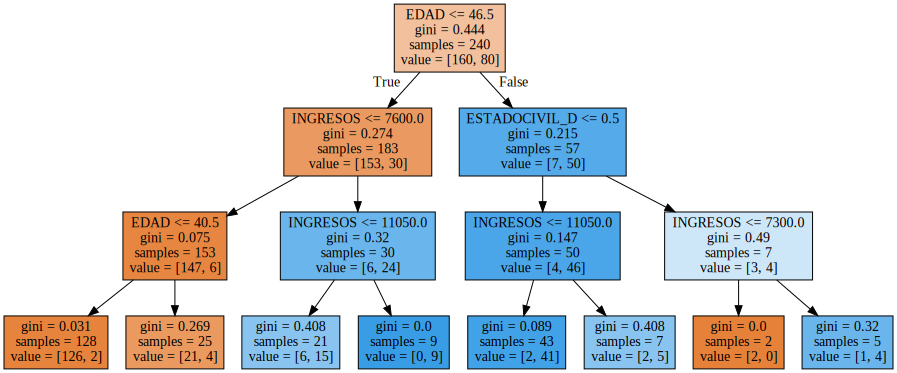

In [61]:
graph = Source( export_graphviz(model, out_file=None, feature_names=features_to_model, filled=True))
SVG(graph.pipe(format='svg'))

### 4.1.4 Variables Importantes

In [62]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model.feature_importances_

In [63]:
ftrs = features.sort_values(by = ['importance','feature'],ascending=False)
ftrs = ftrs.reset_index(drop = True)
ftrs

,feature,importance
0,EDAD,0.569608
1,INGRESOS,0.411544
2,ESTADOCIVIL_D,0.018848
3,SEXO,0.000000
4,ESTADOCIVIL_S,0.000000
5,EDAD_RANGO,0.000000


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

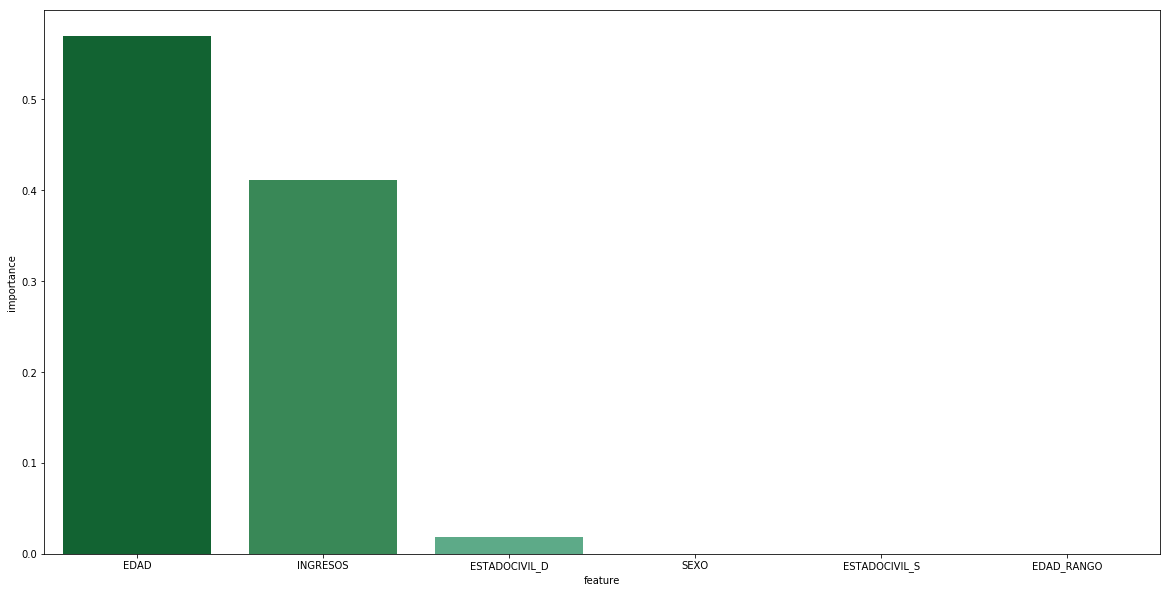

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
g = sns.barplot(x='feature', y='importance', data=ftrs, order=ftrs['feature'], ax=ax, palette='BuGn_r')

### 4.2 RANDOM FOREST

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
# Declarar el modelo a usar
model = RandomForestClassifier(n_estimators = 20, max_depth = 5, random_state = 20, n_jobs = -1,
                              max_features = 4)

In [68]:
# Entrenar (ajustar) el modelo
model = model.fit(X_train, y_train)

In [69]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

### 4.2.2 Evaluación del Modelo

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [71]:
confusion_matrix(y_train, pred_train)

array([[153,   7],
       [  5,  75]], dtype=int64)

In [72]:
accuracy_train = accuracy_score(y_train, pred_train)
print("El accuracy del modelo en data de training es:", accuracy_train)

El accuracy del modelo en data de training es: 0.95


In [73]:
confusion_matrix(y_test, pred_test)

array([[94,  3],
       [14, 49]], dtype=int64)

In [74]:
accuracy_test = accuracy_score(y_test, pred_test)
print("El accuracy del modelo en data de testing es:", accuracy_test)

El accuracy del modelo en data de testing es: 0.89375


### Importance Features Random Forest

In [75]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model.feature_importances_

In [76]:
ftrs = features.sort_values(by = ['importance','feature'],ascending=False)
ftrs = ftrs.reset_index(drop = True)
ftrs

,feature,importance
0,EDAD,0.467311
1,INGRESOS,0.422768
2,EDAD_RANGO,0.054542
3,ESTADOCIVIL_D,0.024596
4,SEXO,0.015666
5,ESTADOCIVIL_S,0.015116


### 4.2.3 Variables Importantes

In [77]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model.feature_importances_

In [78]:
ftrs = features.sort_values(by = ['importance','feature'],ascending=False)
ftrs = ftrs.reset_index(drop = True)
ftrs

,feature,importance
0,EDAD,0.467311
1,INGRESOS,0.422768
2,EDAD_RANGO,0.054542
3,ESTADOCIVIL_D,0.024596
4,SEXO,0.015666
5,ESTADOCIVIL_S,0.015116


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

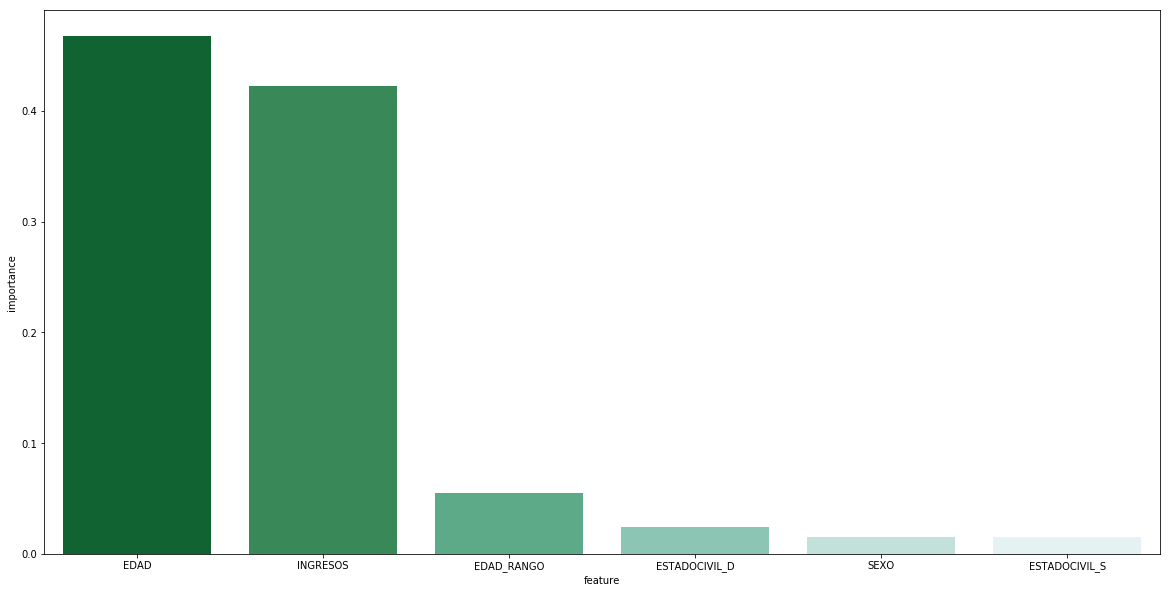

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
g = sns.barplot(x='feature', y='importance', data=ftrs, order=ftrs['feature'], ax=ax, palette='BuGn_r')